In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D


from tqdm import tqdm 
%matplotlib inline

# plt.style.use("dark_background")

In [2]:
permittivity_of_vacuum = 8.85419e-12
permeability_of_vacuum = 1.25664e-06

In [5]:
# %%time
# set 
t = 0
dt = 1e-10
nt= 100
f = 1 * 1e8
amplitude = 0.1

ndim = 2
Nx = Ny = 60
dx = dy = 0.1



# set field properties
conductivity = 0 * np.ones((Nx, Ny, 1))
permittivity = permittivity_of_vacuum * np.ones((Nx, Ny, 1))
permeability = permeability_of_vacuum * np.ones((Nx, Ny, 1))


coeff1 = conductivity * dt / (2 * permittivity)
c_ez = (1 - coeff1) / (1 + coeff1) 
c_ezlx = dt/(permittivity * dx * (1 + coeff1))
c_ezly = dt/(permittivity * dy * (1 + coeff1))

c_hxlx = dt/(permeability * dx)
c_hxly = dt/(permeability * dy)

e_field = np.zeros((Nx, Ny, 1)) # only z direction
h_field = np.zeros((Nx, Ny, 2)) # x and y direction

# set excitation properties
ex_x = int(Nx / 2)
ex_y = int(Ny / 2)
t_arr  = np.arange(nt) * dt
ez_result = np.zeros((t_arr.shape[0], Nx, Ny, 1))

z0 = np.sqrt(permeability_of_vacuum/permittivity_of_vacuum)
c = 1/ np.sqrt( permeability_of_vacuum * permittivity_of_vacuum)
wave_length = f / c
print("check stable", 1/(np.sqrt((1/dx)**2 + (1/dy)**2)) >c * dt)
print("wave_length : {}[m], x_limit : {}[m], y_limit : {}[m], dx : {}[m], dy : {}[m]".format(wave_length, Nx*dx, Ny*dy, dx, dy))

e_field = np.zeros((Nx, Ny, 1)) # only z direction
h_field = np.zeros((Nx, Ny, 2)) # x and y direction

# set excitation properties
'''
ex_x = int(Nx / 2)
ex_y = int(Ny / 2)
t_arr  = np.arange(nt) * dt
ez_val = amplitude * np.sin(2 * np.pi * f * t_arr)
ez_result = np.zeros((t_arr.shape[0], Nx, Ny, 1))
'''
# init_plane_wave = amplitude * np.sin(2 * np.pi * f  / c * dy * np.arange(Ny))
e_field[ex_x,ex_y,0] = amplitude

for k, t in tqdm(enumerate(t_arr)):
    ez_result[k] = e_field
    # calc Ez
    for i  in range(1,Nx):
        for j  in range(1,Ny):
            e_field[i, j] = c_ez[i, j] * e_field[i,j] + c_ezly[i,j]*(h_field[i,j,0] - h_field[i,j-1,0])  \
            + c_ezlx[i,j]*(h_field[i,j,1] - h_field[i-1,j,1])
    # e_field
    # print(e_field[ex_x-1:ex_x+2,ex_y-1:ex_y+2])
    # calc Hx
    for i  in range(0, Nx):
        for j  in range(0, Ny - 1):
            h_field[i,  j, 0] = h_field[i,  j, 0] - c_hxly[i, j] * (e_field[i, j+1] - e_field[i, j])
    # calc Hy
    for i  in range(0, Nx - 1):
        for j  in range(0, Ny):
            h_field[i,  j, 1] = h_field[i,  j, 1] + c_hxlx[i, j] * (e_field[i+1, j] - e_field[i, j])
    #plt.plot(t_arr, ez_val)
print(np.sqrt(np.sum(e_field**2)))

1it [00:00,  9.23it/s]

check stable True
wave_length : 0.33356452631537425[m], x_limit : 6.0[m], y_limit : 6.0[m], dx : 0.1[m], dy : 0.1[m]


100it [00:09,  8.91it/s]

1.229061982164892e+23


In [6]:
X = np.linspace(0, Nx*dx, Nx, endpoint=False)
Y = np.linspace(0, Ny*dy, Ny, endpoint=False)
X, Y = np.meshgrid(Y, X)

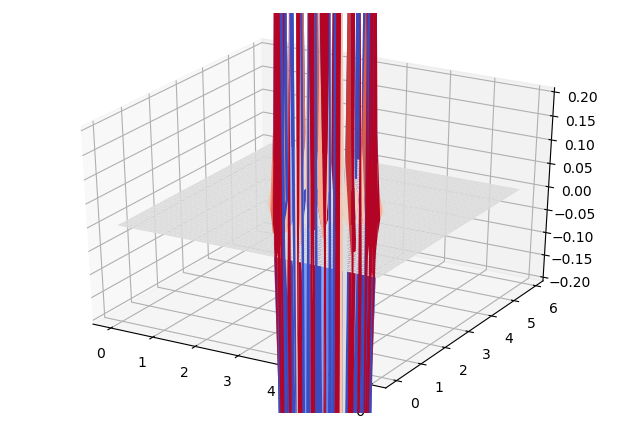

In [9]:
time_frame = 30

fig = plt.figure()
fig.set_dpi(100)
ax = Axes3D(fig)
ax.clear()
ax.plot_surface(X, Y, ez_result[time_frame,:,:,0], rstride=1, cstride=1, cmap=plt.cm.coolwarm,vmax=0.2,vmin=-0.2)
ax.set_zlim(-0.2, 0.2)
plt.show()